In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Ruta al archivo CSV
csv_path = 'data/superstore.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_path, encoding='latin1')

# Mostrar el DataFrame
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

# Hipótesis y Preguntas de Interés

1. **¿Cuáles son las categorías de productos más rentables?**
   - Hipótesis: Algunas categorías generan más beneficios que otras.

2. **¿Cómo varían las ventas y el beneficio por región?**
   - Hipótesis: Existen regiones donde las ventas y beneficios son significativamente más altos.

3. **¿Qué tipo de envío resulta en mayores beneficios?**
   - Hipótesis: Los tipos de envío más rápidos o costosos generan más beneficios.

4. **¿Cómo influye el descuento en las ventas y el beneficio?**
   - Hipótesis: Un mayor descuento puede reducir las ventas totales y el beneficio.

5. **¿Cuál es el impacto del segmento de clientes en las ventas y el beneficio?**
   - Hipótesis: Los segmentos de clientes (Consumer, Corporate, etc.) tienen diferentes patrones de compra.

6. **¿Hay algún patrón temporal en las ventas o beneficios (por ejemplo, estacionalidad)?**
   - Hipótesis: Las ventas pueden ser más altas en ciertos meses o trimestres.


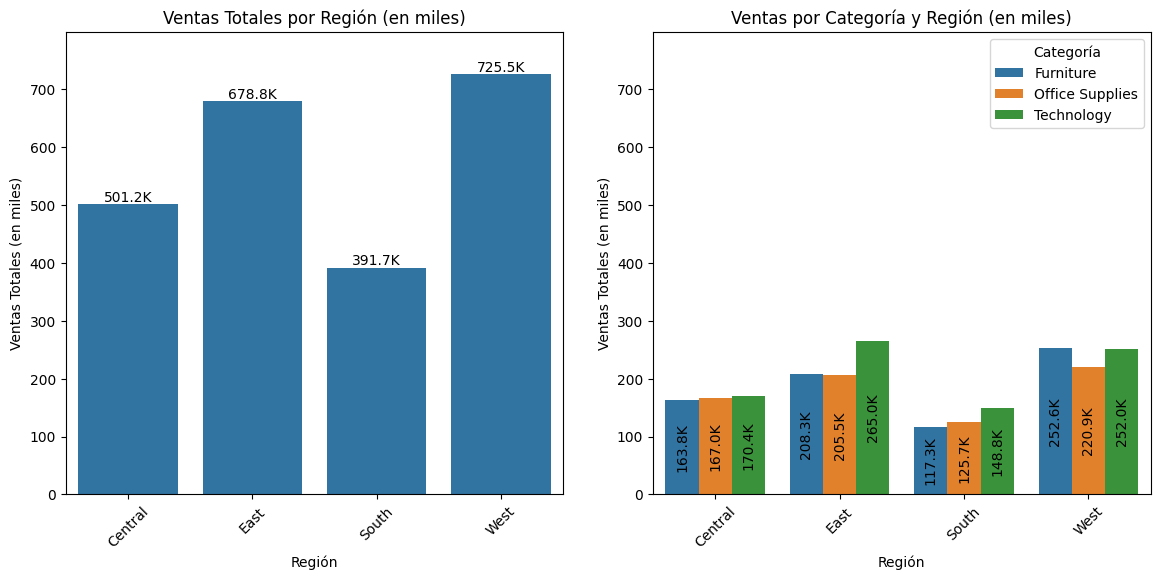

In [4]:
# Crear una figura con dos subgráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Ventas Totales por Región
total_sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
total_sales_by_region['Sales'] /= 1000  # Convertir a miles
bar_plot = sns.barplot(data=total_sales_by_region, x='Region', y='Sales', ax=axes[0])

# Agregar etiquetas de ventas totales sobre cada barra
for p in bar_plot.patches:
    if p.get_height() > 0.1:  # Agregar una condición para evitar valores pequeños
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

axes[0].set_title('Ventas Totales por Región (en miles)')
axes[0].set_ylabel('Ventas Totales (en miles)')
axes[0].set_xlabel('Región')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Ventas por Categoría y Región (con totales)
plt_data = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
plt_data['Sales'] /= 1000  # Convertir a miles
sns.barplot(data=plt_data, x='Region', y='Sales', hue='Category', ax=axes[1], errorbar=None)

# Agregar etiquetas de ventas totales dentro de cada barra en el Gráfico 2
for p in axes[1].patches:
    if p.get_height() > 0.1:  # Agregar una condición para evitar valores pequeños
        axes[1].annotate(f'{p.get_height():,.1f}K', 
                         (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Centrar verticalmente
                         ha='center', va='center', fontsize=10, rotation=90)  # Rotar a vertical

axes[1].set_title('Ventas por Categoría y Región (en miles)')
axes[1].set_ylabel('Ventas Totales (en miles)')
axes[1].set_xlabel('Región')
axes[1].legend(title='Categoría')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el límite del eje y para que ambos gráficos tengan la misma escala
max_sales = max(total_sales_by_region['Sales'].max(), plt_data['Sales'].max())
axes[0].set_ylim(0, max_sales * 1.1)
axes[1].set_ylim(0, max_sales * 1.1)

# Ajustar el espacio entre las subgráficas
plt.subplots_adjust(wspace=0.18)

# Mostrar los gráficos
plt.show()





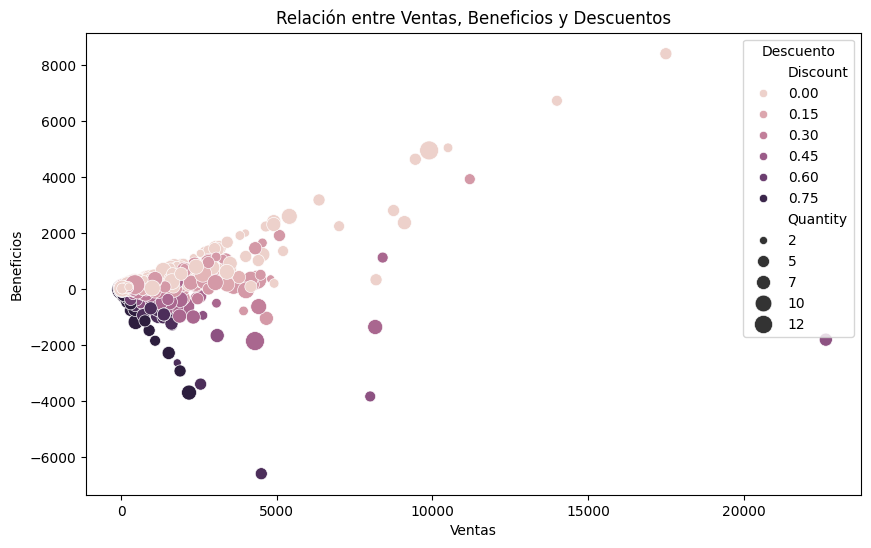

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount', size='Quantity', sizes=(20, 200))
plt.title('Relación entre Ventas, Beneficios y Descuentos')
plt.xlabel('Ventas')
plt.ylabel('Beneficios')
plt.legend(title='Descuento')
plt.show()



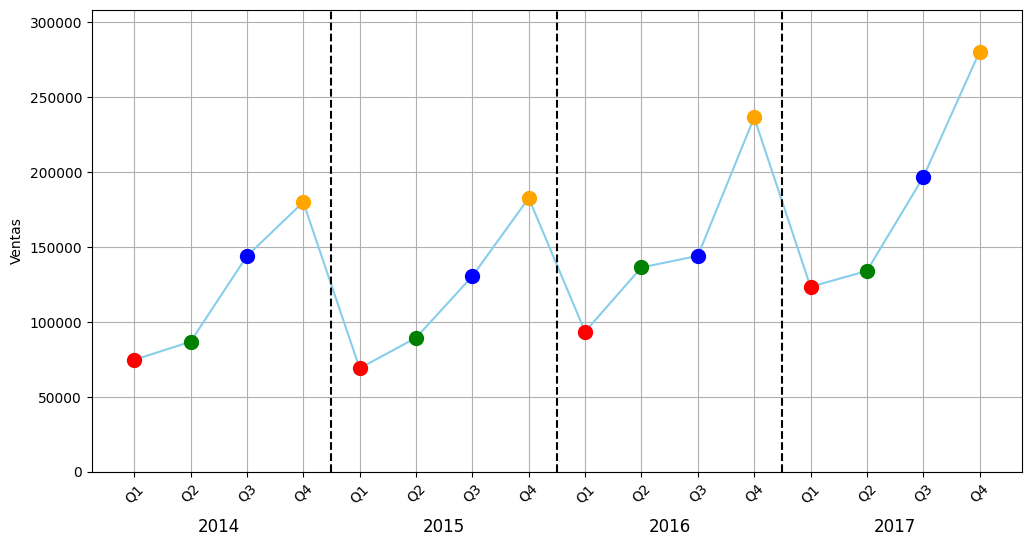

In [6]:
# Convertir la columna 'Order Date' a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por trimestre y año, sumando las ventas
sales_over_quarter = df.groupby(df['Order Date'].dt.to_period('Q')).agg({'Sales': 'sum'}).reset_index()

# Crear una nueva columna para mostrar el trimestre
sales_over_quarter['Quarter'] = 'Q' + sales_over_quarter['Order Date'].dt.quarter.astype(str)

# Crear una nueva columna para el año
sales_over_quarter['Year'] = sales_over_quarter['Order Date'].dt.year.astype(str)

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Gráfico de líneas
plt.plot(sales_over_quarter['Quarter'] + " " + sales_over_quarter['Year'], sales_over_quarter['Sales'], color='skyblue')

# Pintar los puntos de diferentes colores
colors = {'Q1': 'red', 'Q2': 'green', 'Q3': 'blue', 'Q4': 'orange'}

for index, row in sales_over_quarter.iterrows():
    plt.scatter(row['Quarter'] + " " + row['Year'], row['Sales'], color=colors[row['Quarter']], marker='o', s=100, zorder=5)  # Asegura que los puntos estén sobre la línea

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45)

# Eliminar título y agregar solo etiquetas
plt.title('')
plt.ylabel('Ventas')

# Ajustar los ticks del eje x para mostrar solo los trimestres sin repetir años
xticks = sales_over_quarter['Quarter'].tolist()
plt.xticks(ticks=range(len(xticks)), labels=xticks)

# Centrar los años debajo de los Q
years = sales_over_quarter['Year'].unique()
for i, year in enumerate(years):
    plt.text(i * 4 + 1.5, -37000, year, ha='center', va='center', fontsize=12)

# Añadir líneas verticales segmentadas para separar los años
for i in range(len(years) - 1):
    plt.axvline(x=(i + 1) * 4 - 0.5, color='black', linestyle='--')

# Ajustar límites del eje Y si es necesario
plt.ylim(0, sales_over_quarter['Sales'].max() * 1.1)

plt.grid()
plt.show()



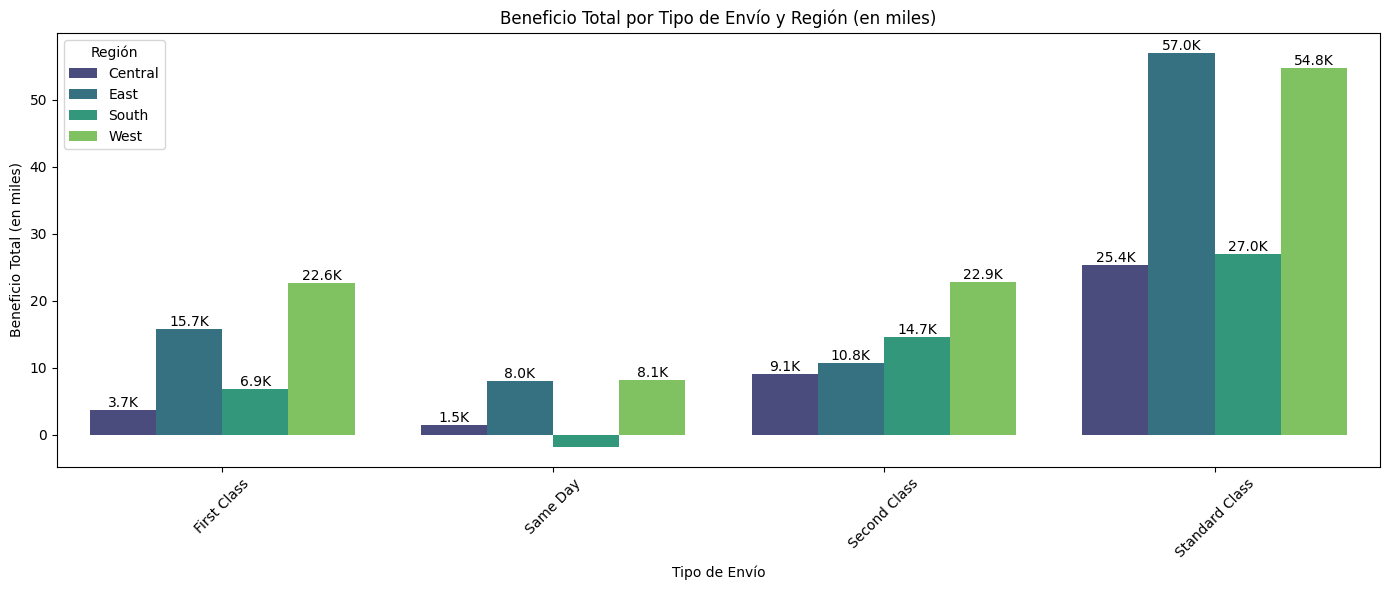

In [7]:
# Gráfico: Impacto de los tipos de envío sobre el beneficio por región
plt.figure(figsize=(14, 6))

# Agrupar por tipo de envío y región, y sumar los beneficios
profit_by_ship_mode_region = df.groupby(['Ship Mode', 'Region'])['Profit'].sum().reset_index()
profit_by_ship_mode_region['Profit'] /= 1000  # Convertir a miles

# Crear el gráfico de barras con un estilo de paleta
bar_plot = sns.barplot(data=profit_by_ship_mode_region, x='Ship Mode', y='Profit', hue='Region', palette='viridis')

# Agregar etiquetas de beneficios sobre cada barra
for p in bar_plot.patches:
    if p.get_height() > 0.1:  # Agregar una condición para evitar valores pequeños
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

plt.title('Beneficio Total por Tipo de Envío y Región (en miles)')
plt.ylabel('Beneficio Total (en miles)')
plt.xlabel('Tipo de Envío')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



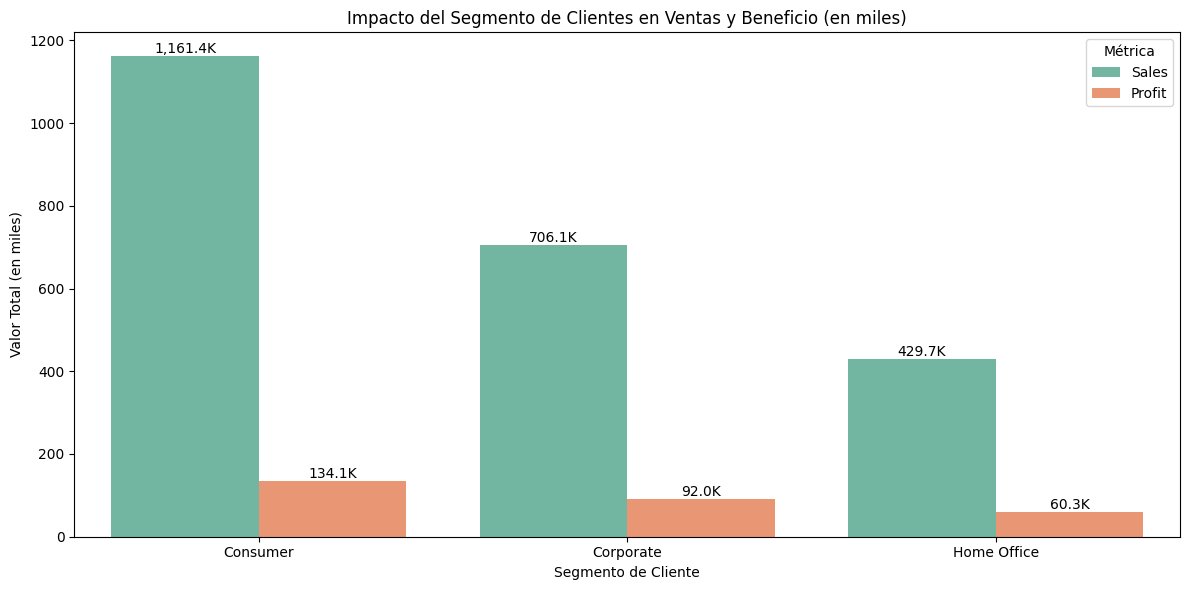

In [8]:
# Agrupar por segmento de cliente y calcular las ventas y el beneficio totales
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Convertir las ventas y el beneficio a miles para mejorar la legibilidad
sales_profit_by_segment['Sales'] /= 1000  # Convertir a miles
sales_profit_by_segment['Profit'] /= 1000  # Convertir a miles

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear gráfico de barras agrupado
bar_plot = sns.barplot(data=sales_profit_by_segment.melt(id_vars='Segment'), 
                       x='Segment', y='value', hue='variable', palette='Set2')

# Agregar etiquetas en las barras, pero solo si el valor es mayor que cero
for p in bar_plot.patches:
    if p.get_height() > 0:  # Verificar si el valor es mayor que 0
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

# Añadir título y etiquetas de ejes
plt.title('Impacto del Segmento de Clientes en Ventas y Beneficio (en miles)')
plt.ylabel('Valor Total (en miles)')
plt.xlabel('Segmento de Cliente')

# Mostrar leyenda y gráfico
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()



In [9]:
# Agrupar por segmento de cliente y sumar las ventas
total_sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

# Mostrar los resultados
print(total_sales_by_segment)


       Segment         Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05


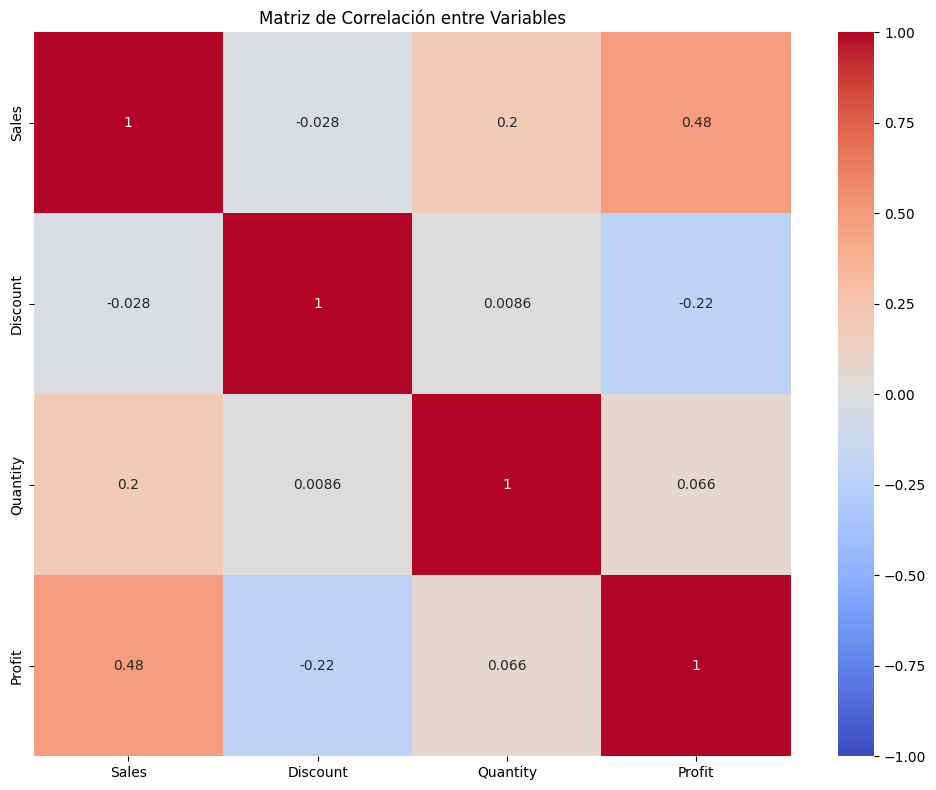

In [13]:
# Seleccionar las columnas que quieres analizar para la correlación
df_corr = df[['Sales', 'Discount', 'Quantity', 'Profit']]  # Añade más columnas si es necesario

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Agregar título
plt.title('Matriz de Correlación entre Variables')

# Mostrar gráfico
plt.tight_layout()
plt.show()